# Project 2: Moneyball

Rena Repenning and Eddy Salazar

Collaboration plan: Rena and Eddy simultaneously collaborated on this notebook using colabs. We also used video call and text message to update eachother and communicate concerns.

"We want to understand how efficient teams have been historically at spending money and getting wins in return. In the case of Moneyball, one would expect that Oakland was not much more efficient than other teams in their spending before 2000, were much more efficient (they made a movie about it after all) between 2000 and 2005, and by then other teams may have caught up."

# Part 1: Wrangling

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

sqlite_file = '/content/drive/My Drive/cmps3160/_projects/lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)
cursor = conn.cursor()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Compute a relation containing the total payroll and winning percentage for each team.

In [ ]:
# Query SQLite dataset
playerPayRatio_query = '''SELECT Teams.name, Teams.yearID, Teams.teamID, (CAST(Teams.W as float)/CAST(Teams.G as float)*100) as winningPercentage, Teams.franchID, Teams.lgID, Teams.Rank,
                              sum(Salaries.salary) as total_payroll
                        FROM Salaries
                        INNER JOIN Teams
                        ON Teams.yearID = Salaries.yearID
                        AND Teams.teamID = Salaries.teamID
                        AND Teams.lgID = Salaries.lgID
                        GROUP BY Teams.yearID, Teams.teamID'''
# Run query and create DF
teamDf = pd.read_sql(playerPayRatio_query, conn)
teamDf.head()

# This givens us no nans --> we know we have no missing data
# for k in teamDf.columns:
#   print(teamDf[k].unique())

,name,yearID,teamID,winningPercentage,franchID,lgID,Rank,total_payroll
0,Atlanta Braves,1985,ATL,40.740741,ATL,NL,5,14807000.0
1,Baltimore Orioles,1985,BAL,51.552795,BAL,AL,4,11560712.0
2,Boston Red Sox,1985,BOS,49.693252,BOS,AL,5,10897560.0
3,California Angels,1985,CAL,55.555556,ANA,AL,2,14427894.0
4,Chicago White Sox,1985,CHA,52.147239,CHW,AL,3,9846178.0


#### **Missing data**
We did not find any missing Nans after checking each column's series. We used an inner join to be sure there were no players or teams missing full data that were included.


Progression over time for Boston Red Sox

In [ ]:
teamDf["name"].unique()
sox = teamDf[teamDf.name == "Boston Red Sox"]
sox

,name,yearID,teamID,winningPercentage,franchID,lgID,Rank,total_payroll
2,Boston Red Sox,1985,BOS,49.693252,BOS,AL,5,10897560.0
28,Boston Red Sox,1986,BOS,59.006211,BOS,AL,1,14402239.0
54,Boston Red Sox,1987,BOS,48.148148,BOS,AL,5,10144167.0
80,Boston Red Sox,1988,BOS,54.938272,BOS,AL,1,13896092.0
106,Boston Red Sox,1989,BOS,51.234568,BOS,AL,3,17481748.0
132,Boston Red Sox,1990,BOS,54.320988,BOS,AL,1,20558333.0
158,Boston Red Sox,1991,BOS,51.851852,BOS,AL,2,35167500.0
184,Boston Red Sox,1992,BOS,45.061728,BOS,AL,7,43610584.0
210,Boston Red Sox,1993,BOS,49.382716,BOS,AL,5,37120583.0
238,Boston Red Sox,1994,BOS,46.956522,BOS,AL,4,37859084.0


# Part 2: Exploratory Data Analysis

## Payroll Distribution
#### Problem 2: Distribution of payrolls across teams conditioned on time

Text(0.5, 1.0, 'Total Payroll Through the Years')

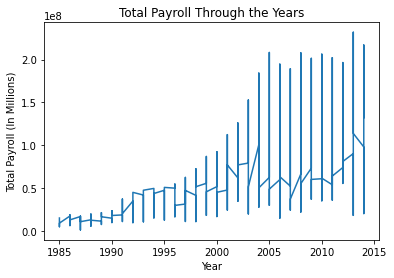

In [ ]:
totalpayrollvswin = teamDf
#plotting total payroll across teams for each year
plt.plot(totalpayrollvswin.yearID, totalpayrollvswin.total_payroll)
plt.ylabel('Total Payroll (In Millions)')
plt.xlabel('Year')
plt.title('Total Payroll Through the Years')


#### Winning percentage as a function of payroll

Text(0.5, 1.0, 'Win Rate vs. Total Payroll')

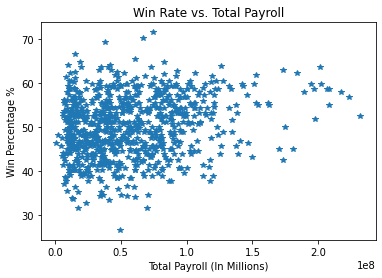

In [ ]:
#creating a scatter plot of winning percentage of each team per year vs their total payroll per that year
plt.plot(totalpayrollvswin.total_payroll, totalpayrollvswin.winningPercentage, '*')
plt.xlabel('Total Payroll (In Millions)')
plt.ylabel('Win Percentage %')
plt.title('Win Rate vs. Total Payroll')

#### **Question 1:**
- There is a trend of increasing total payrolls as time goes on.
- There is not a strong correlation between win rate and total payroll
- Since 1990 total payrolls have increased by about 50% per year
- Payrolls experienced lots of growth between 2000 and 2005, and now experience less growth
- Win rate vs. total payroll seems to have a positive linear correlation with a small coefficient


#### Problem 3

' There is a large jump in salaries from 2000 to 2005, and then less pronounced before and after'

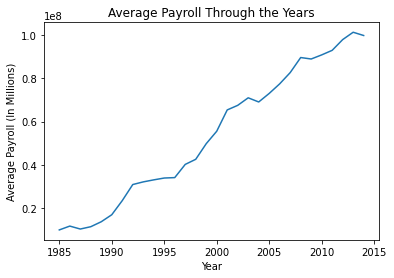

In [ ]:
#creating df for mean payrolls vs year
meanpayrollvsyear = teamDf[["name","yearID","total_payroll"]]

#use groupby to average the salaries for years to create total payroll per year across teams
meanpayrollvsyear = meanpayrollvsyear.groupby(['yearID'])['total_payroll'].mean()

#plotting mean payroll across teams for each year to show central tendancy
plt.plot(meanpayrollvsyear.index, meanpayrollvsyear.values)
plt.ylabel('Average Payroll (In Millions)')
plt.xlabel('Year')
plt.title('Average Payroll Through the Years')

''' There is a large jump in salaries from 2000 to 2005, and then less pronounced before and after'''

## Correlation between payroll and winning percentage
#### Problem 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


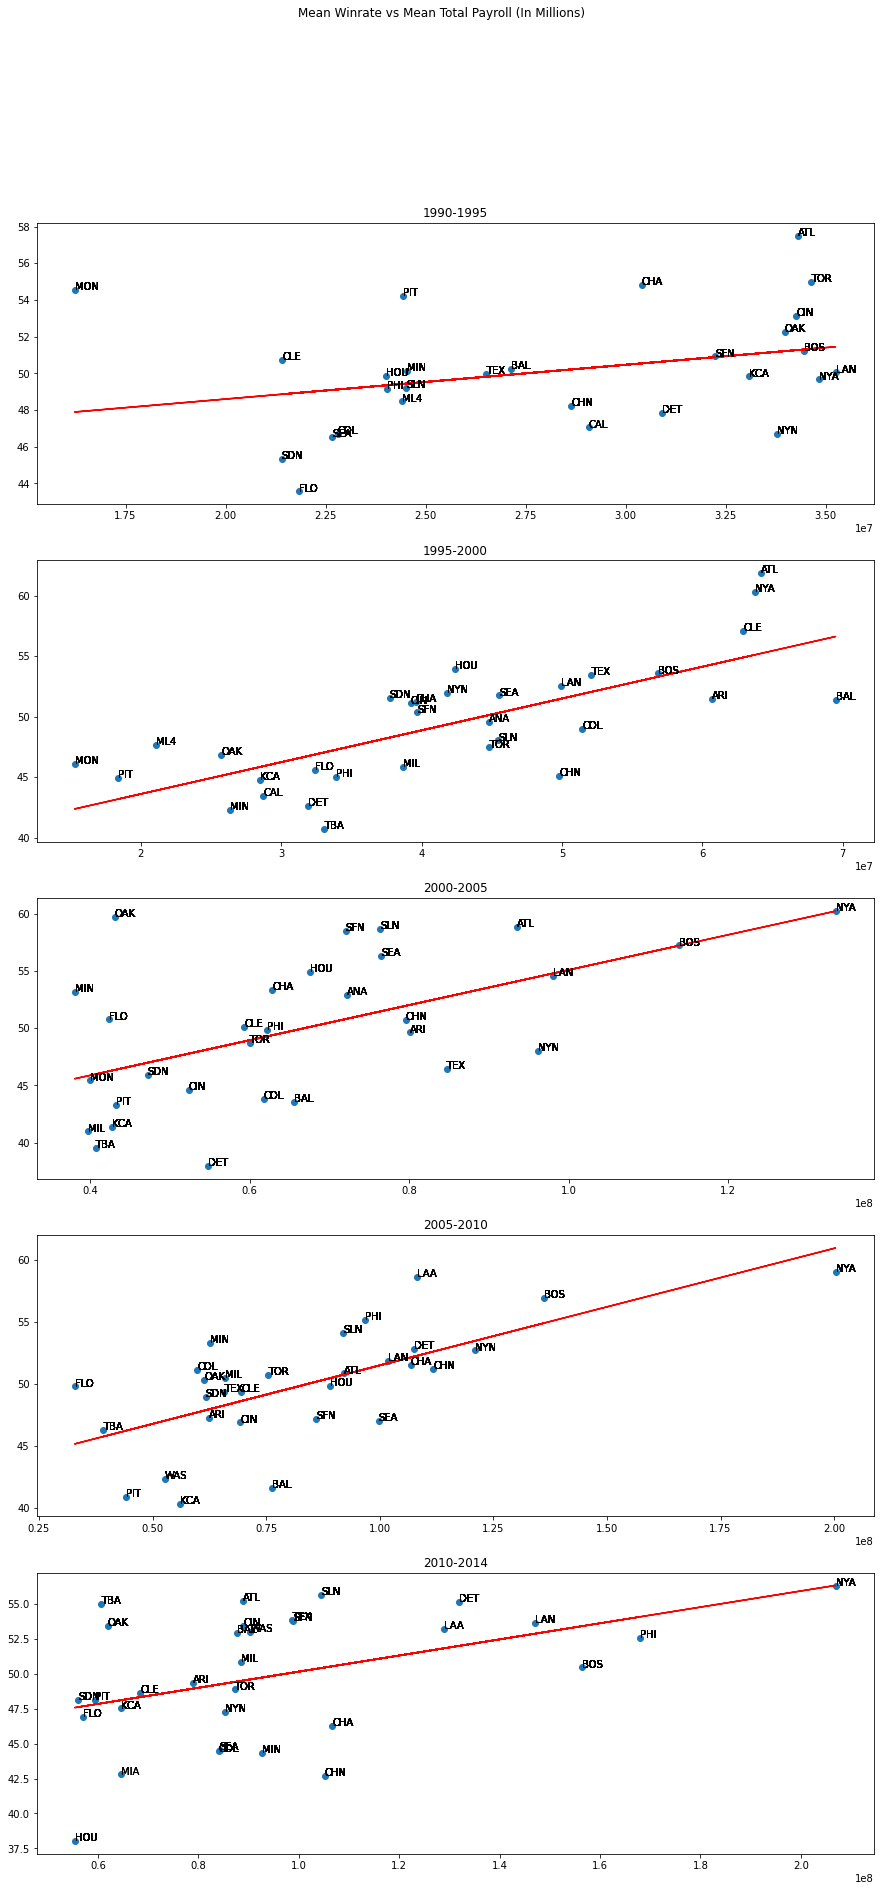

In [ ]:
from scipy import stats

#creating df for mean payrolls and winning percentage vs year
meanpayrollandwin = teamDf[["name", "teamID", "yearID","total_payroll","winningPercentage"]]
meanpayrollandwin["yearID"] = pd.to_numeric(meanpayrollandwin.loc[:, "yearID"], errors="coerce", downcast='integer')
meanpayrollandwin["total_payroll"] = pd.to_numeric(meanpayrollandwin.loc[:, "total_payroll"], errors="coerce", downcast='integer')

#dropping years unncesscary for this analysis
meanpayrollandwin = meanpayrollandwin[meanpayrollandwin.yearID >= 1990]

#splitting df into 5 year periods so they can be analyzed in subplots
df_split = np.array_split(meanpayrollandwin, 5)
meanpayrollandwin = meanpayrollandwin.reset_index()

#create 5 subplots to for scatter plots to chart mean winpercentage vs mean payroll 
fig, axs = plt.subplots(5,figsize=(15,30))
fig.suptitle('Mean Winrate vs Mean Total Payroll (In Millions)')
fig.add_axes(xlabel="win percentage", ylabel="mean payroll")
teamnames = meanpayrollandwin.name

#creating regression lines for each five year period # this won't work if we just concat the value to the list idk why
res = [""]*5
  
for i, t in enumerate(["1990-1995", "1995-2000", "2000-2005", "2005-2010", "2010-2014"]):
  x = df_split[i].groupby("teamID")["total_payroll"].mean()
  y = df_split[i].groupby("teamID")["winningPercentage"].mean()
  # scatter
  axs[i].scatter(x, y)
  # get a regression from the means of total_payroll and winning percentage
  res[i] = stats.linregress(x=x, y=y)
  #adding regression line to plot i
  axs[i].plot(x, res[i].intercept + res[i].slope*x, 'r')
  
  for j in meanpayrollandwin.teamID:
    if j in x and j in y:
      pay = x[j]
      wins = y[j]
      # plot individual team's label
      axs[i].annotate(j, (pay, wins))
    
  axs[i].set_title(t)




### Question 2
From 1990-2000 total payroll became more varied. The Moneyball period from 2000-2005 shows a high increase in efficiency which continues from 2005-2014.

Some notably efficient teams:
- Tampa Bay Rays (2005-2014)
- Minnesota Twins (2000-2010)
- Florida Marlins (2000-2010)

The Oakland A's had outstanding spending efficiency during the Moneyball period from 2000 - 2005. Their spending efficiency fell during 2005 - 2010 but increased again in the 2010 - 2014 period.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


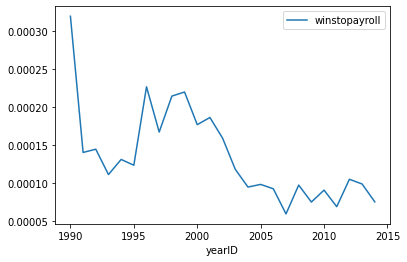

In [ ]:

oakland = meanpayrollandwin[(meanpayrollandwin.name == "Oakland Athletics") & (meanpayrollandwin.yearID >= 1990)]
oakland["winstopayroll"] = oakland["winningPercentage"]*100/oakland["total_payroll"]

oakland.plot(x="yearID", y="winstopayroll")

# Part 3: Data Transformations

## Standardizing across years
Standardized payroll conditioned on year.

$$ standardized payroll_{ij} = \frac{payroll_{ij} - avg payroll_{ij}}{s_j}$$

#### Problem 5

In [ ]:
meanpayrollandwin["standard_payroll"] = (meanpayrollandwin["total_payroll"] - meanpayrollandwin["total_payroll"].mean())/ meanpayrollandwin["total_payroll"].std()
meanpayrollandwin.head()

,index,name,teamID,yearID,total_payroll,winningPercentage,standard_payroll
0,130,Atlanta Braves,ATL,1990,14555501,40.123457,-1.278404
1,131,Baltimore Orioles,BAL,1990,9680084,47.204969,-1.406030
2,132,Boston Red Sox,BOS,1990,20558333,54.320988,-1.121266
3,133,California Angels,CAL,1990,21720000,49.382716,-1.090857
4,134,Chicago White Sox,CHA,1990,9491500,58.024691,-1.410967


#### Problem 6
Graph standardized data in same way

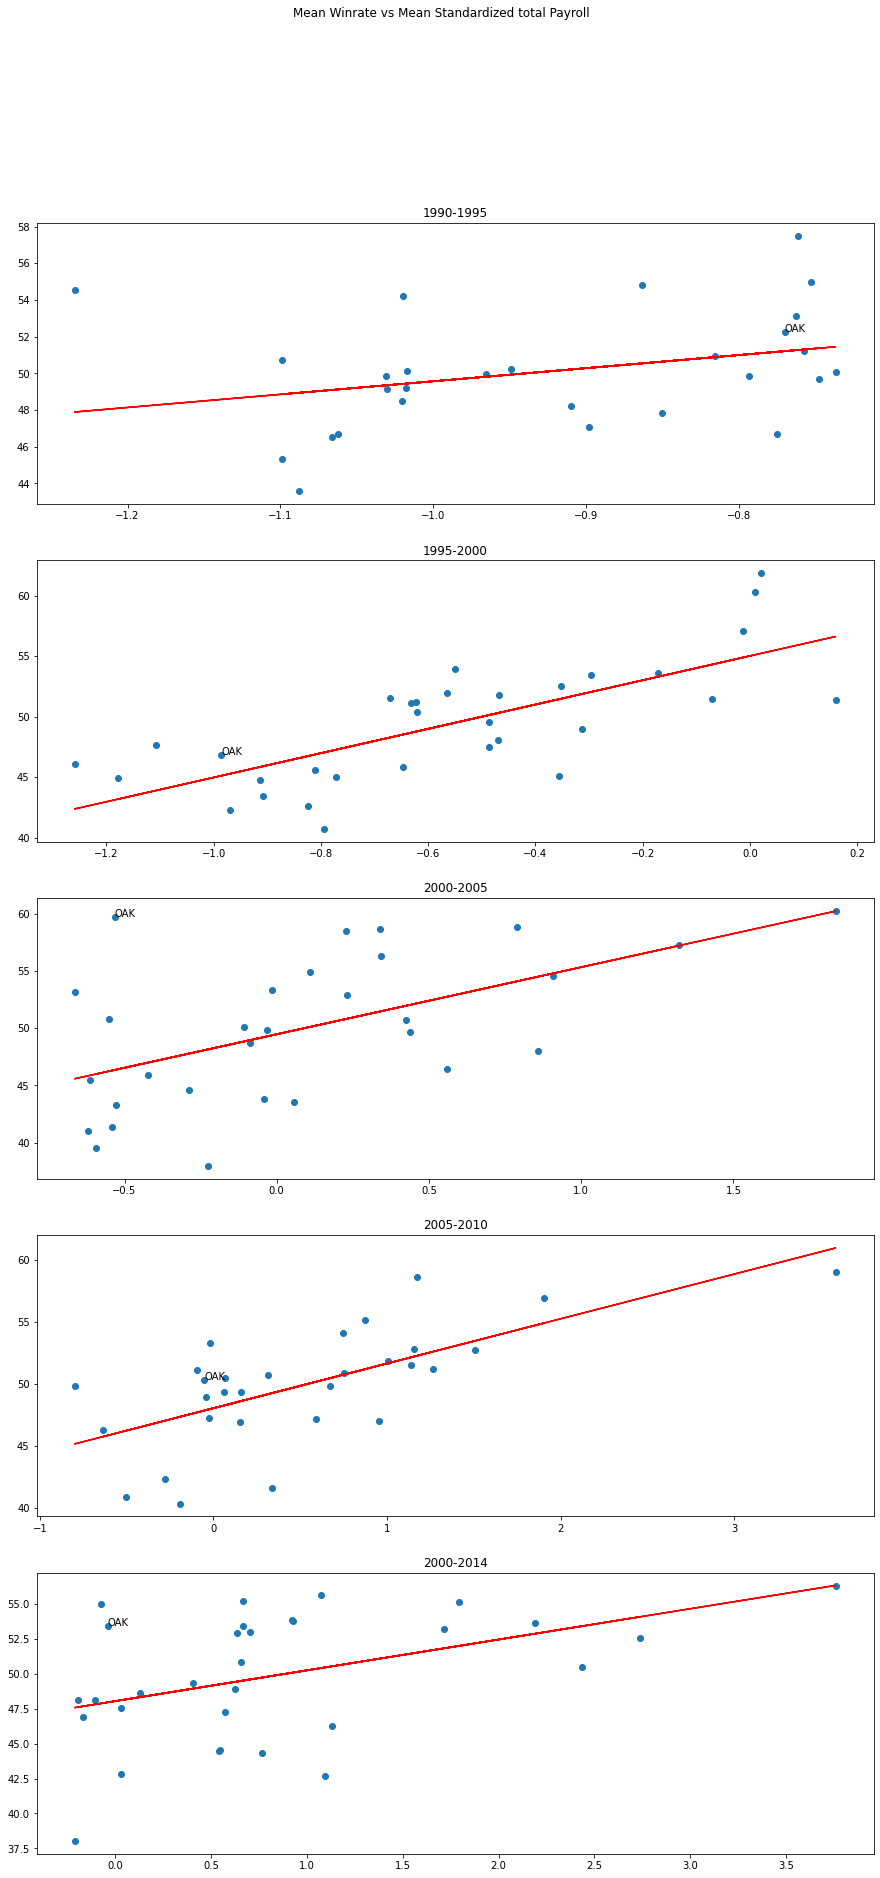

In [ ]:
#splitting df into 5 year periods so they can be analyzed in subplots
df_split = np.array_split(meanpayrollandwin, 5)

#create 5 subplots to for scatter plots to chart mean winpercentage vs mean payroll 
fig, axs = plt.subplots(5,figsize=(15,30))
fig.suptitle('Mean Winrate vs Mean Standardized total Payroll')
fig.add_axes(xlabel="win percentage", ylabel="std mean total payroll")

#creating regression lines for each five year period
res = [""]*5
for i, t in enumerate(["1990-1995", "1995-2000", "2000-2005", "2005-2010", "2000-2014"]):
  xs = df_split[i].groupby("teamID")["standard_payroll"].mean()
  ys = df_split[i].groupby("teamID")["winningPercentage"].mean()
  # scatter
  axs[i].scatter(xs, ys)
  # get a regression from the means of total_payroll and winning percentage
  res[i] = stats.linregress(x=xs, y=ys)
  #adding regression line to plot i
  # only plotting OAK
  axs[i].plot(xs, res[i].intercept + res[i].slope*xs, 'r')
  
  pay = xs["OAK"]
  wins = ys["OAK"]
  axs[i].annotate("OAK", xy=(pay, wins))
    
  axs[i].set_title(t)

### Question 3

The standardized data looks exactly the same as the non-standardized data. We notice that the bottom axis changes in unit after standardization, but this doesn't change where the data is placed on the graph.This is not what we expected!

## Expected Wins

#### Problem 7

Text(0.5, 1.0, 'All')

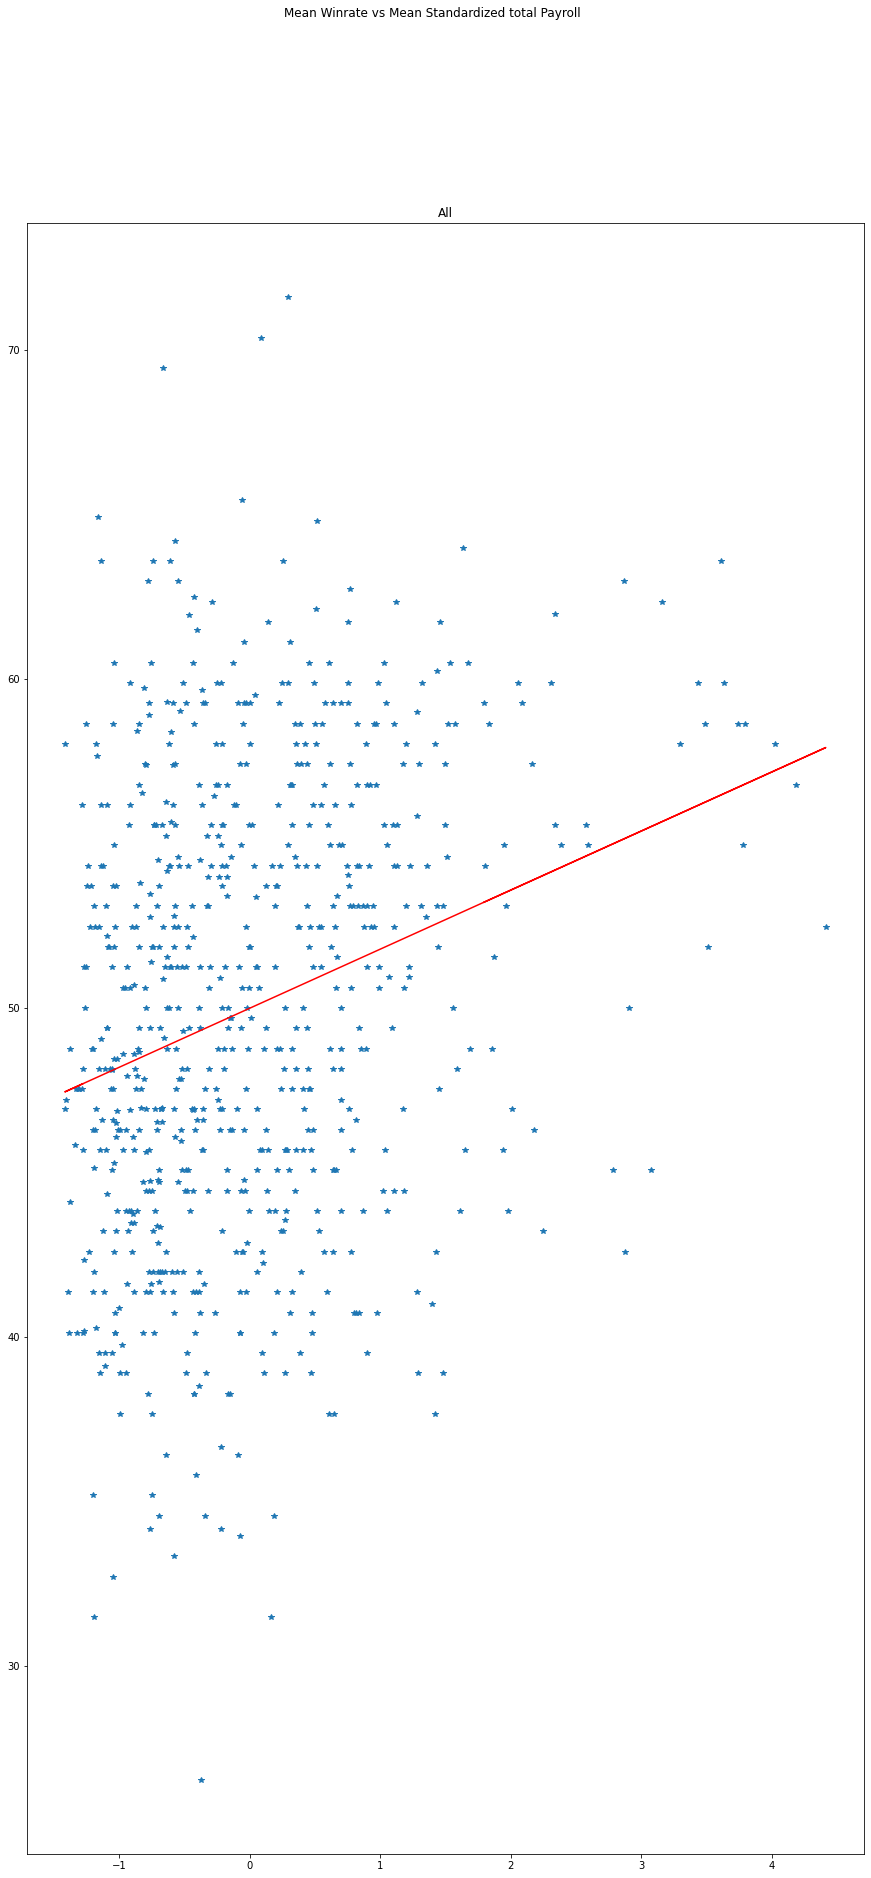

In [ ]:
'''Single scatter plot of winning percentage vs standardized payroll + regression '''

#creating regression lines for entire period
reg = stats.linregress(x= meanpayrollandwin.standard_payroll, y= meanpayrollandwin.winningPercentage)

#create 5 subplots to for scatter plots to chart mean winpercentage vs mean payroll 
fig, axs = plt.subplots(1,figsize=(15,30))
fig.suptitle('Mean Winrate vs Mean Standardized total Payroll')
fig.add_axes(xlabel="win percentage", ylabel="mean total payroll")

axs.plot(meanpayrollandwin.standard_payroll, meanpayrollandwin.winningPercentage,'*')
#adding regression line to plot 
axs.plot(meanpayrollandwin.standard_payroll, reg.intercept + reg.slope*meanpayrollandwin.standard_payroll, 'r')
axs.set_title("All")


## Spending Efficiency

#### Problem 8

$$ expectedWinPct_{ij} = 50 + 2.5 \times standardizedPayroll_{ij}$$

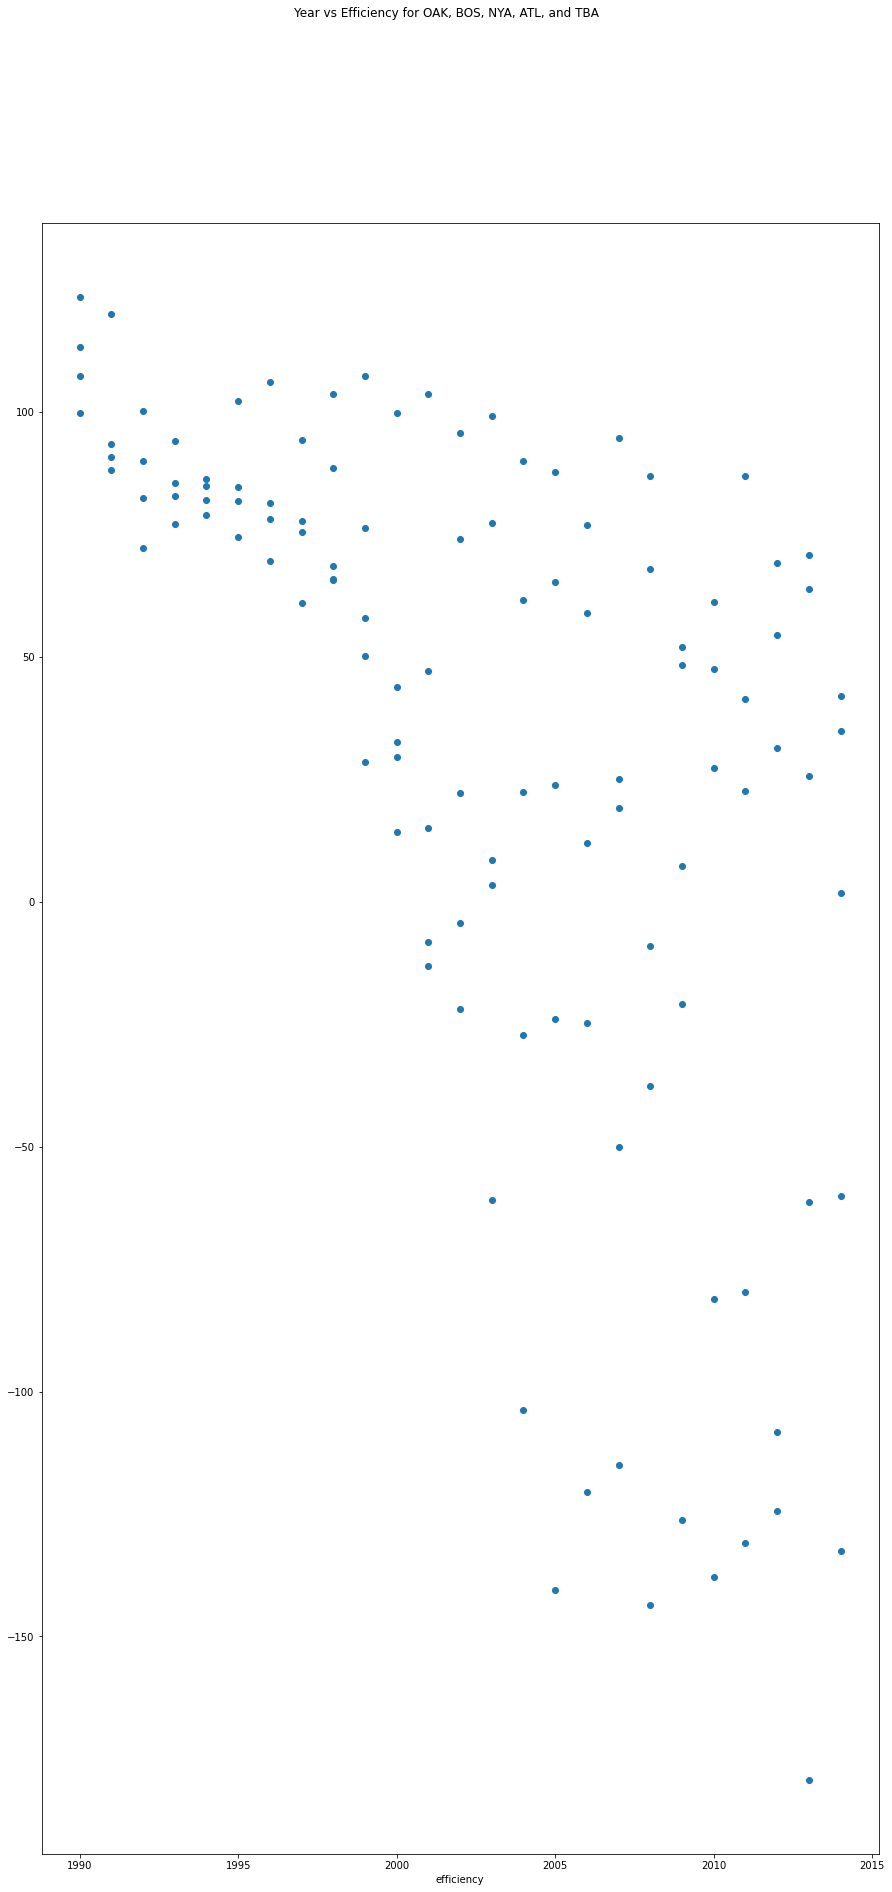

In [ ]:
df = meanpayrollandwin
teamsToWatch = df[(df.teamID == "OAK")|(df.teamID == "BOS") |(df.teamID == "NYA")|(df.teamID == "ATL") |(df.teamID == "TBA")]

fig, axs = plt.subplots(1,figsize=(15,30))
fig.suptitle('Year vs Efficiency for OAK, BOS, NYA, ATL, and TBA')
plt.xlabel("year")
plt.xlabel("efficiency")

axs.scatter(teamsToWatch.yearID, (teamsToWatch.winningPercentage - ((50+2.5)*teamsToWatch.standard_payroll)))



#### Question 4

This graph shows that during and after the moneyball period, teams followed the lead of Oakland. Spending efficiency across the teams observed quickly increased and kept increasing. Oakland's spending efficiency during the moneyball was far better than the spending efficiency of other teams.